# Wordle Solver

## Prepare Data

In [ ]:
# with open('words.txt','r') as f:
#     dictionary = {t.strip().upper() for t in f.readlines() if len(t.strip()) == 5}
# # dictionary

# with open('wordle.txt','w') as f:
#     [f.writelines(x+",") for x in dictionary]

# Wordle AI

In [7]:
import player
from tqdm import tqdm
import game
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

game_record = []
N_games = 1000

### Serialised

In [ ]:
# for game_count in tqdm(range(N_games)):
for game_count in range(N_games):
    bot = player.Player(verbose= False)
    wordle = game.Wordle(verbose= False)
    response = []
    while type(bot.board_response) != int:
        bot.board_response = wordle.play(bot.guess())
    if(bot.board_response == -1):
        game_record.append(7)
    else:
        game_record.append(wordle.guess_number + 1)
    wordle.render()
    print("__________")

### Parallelised

In [10]:
import os
import multiprocess

print(os.cpu_count())

pool = multiprocess.Pool(os.cpu_count() - 2)

8


In [11]:
def simulate(n)->int:
    bot = player.Player(verbose= False)
    wordle = game.Wordle(verbose= False)
    while type(bot.board_response) != int:
        bot.board_response = wordle.play(bot.guess())
    if(bot.board_response == -1):
        game_rec = 7
    else:
        game_rec = wordle.guess_number + 1
    return game_rec

In [12]:
for guess_num in tqdm(pool.imap_unordered(simulate, range(N_games), chunksize = 100)):
    game_record.append(guess_num)
pool.terminate()

1000it [01:24, 11.90it/s]


# Results

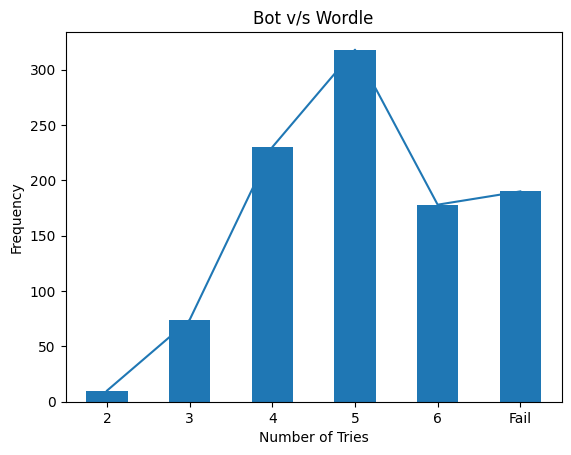

In [13]:
history = pd.Series(game_record).apply(lambda x: ('Fail' if x == 7 else x)).astype('str')
history = history.value_counts().sort_index()
pd.Series(history).plot(kind = "bar")
histoy = history/history.sum()
history.plot(kind = 'line')
plt.xlabel("Number of Tries")
plt.ylabel('Frequency')
plt.title('Bot v/s Wordle')
plt.show()

# Bot Performance

In [14]:
'Expectation', round(sum(game_record)/len(game_record), 4)

('Expectation', 5.15)

***